In [5]:
import pickle
import numpy as np
dic_token = pickle.load(open('dictionary_token.pickle','rb'))[1]
#remember to unzip the file
scumsums = np.load('sample_data/overall_count_lines.npy')
import powerlaw
import matplotlib.pyplot as plt

In [105]:
import matplotlib as mpl
import matplotlib.pyplot as plt


import numpy as np
import networkx as nx


uzh_colors_de = {'blau': '#0028a5', 'blau_80': '#3353b7', 'blau_60': '#667ec9', 'blau_40': '#99a9db', 'blau_20': '#ccd4ed',
               'ockerrot': '#dc6027', 'ockerrot_80': '#e38052', 'ockerrot_60': '#eaa07d', 'ockerrot_40': '#f1bfa9', 'ockerrot_20': '#f8dfd4',
               'lindengruen': '#91c34a', 'lindengruen_80': '#aad470', 'lindengruen_60': '#bfdf94', 'lindengruen_40': '#d5e9b7', 'lindengruen_20': '#eaf4db',
               'warmgelb': '#fede00', 'warmgelb_80': '#fbe651', 'warmgelb_60': '#fcec7c', 'warmgelb_40': '#fdf3a8', 'warmgelb_20': '#fef9d3',
               'grau': '#a3adb7', 'grau_80': '#b5bdc5', 'grau_60': '#c8ced4', 'grau_40': '#dadee2', 'grau_20': '#edeff1',
               'tuerkis': '#0b82a0', 'tuerkis_80': '#3c9fb6', 'tuerkis_60': '#6bb7c7', 'tuerkis_40': '#9ed0d9', 'tuerkis_20': '#cfe8ec',
               'flaschengruen': '#2a7f62', 'flaschengruen_80': '#569d85', 'flaschengruen_60': '#80b6a4', 'flaschengruen_40': '#abcec2', 'flaschengruen_20': '#d5e7e1'}



uzh_colors = {'blue': '#0028a5', 'blue_80': '#3353b7', 'blue_60': '#667ec9', 'blue_40': '#99a9db', 'blue_20': '#ccd4ed',
               'red': '#dc6027', 'red_80': '#e38052', 'red_60': '#eaa07d', 'red_40': '#f1bfa9', 'red_20': '#f8dfd4',
               'green': '#91c34a', 'green_80': '#aad470', 'green_60': '#bfdf94', 'green_40': '#d5e9b7', 'green_20': '#eaf4db',
               'yellow': '#fede00', 'yellow_80': '#fbe651', 'yellow_60': '#fcec7c', 'yellow_40': '#fdf3a8', 'yellow_20': '#fef9d3',
               'grey': '#a3adb7', 'grey_80': '#b5bdc5', 'grey_60': '#c8ced4', 'grey_40': '#dadee2', 'grey_20': '#edeff1',
               'turquoise': '#0b82a0', 'turquoise_80': '#3c9fb6', 'turquoise_60': '#6bb7c7', 'turquoise_40': '#9ed0d9', 'turquoise_20': '#cfe8ec',
               'green2': '#2a7f62', 'green2_80': '#569d85', 'green2_60': '#80b6a4', 'green2_40': '#abcec2', 'green2_20': '#d5e7e1'}


uzh_color_map = ['#0028a5', '#dc6027', '#91c34a', '#fede00', '#a3adb7', '#0b82a0', '#2a7f62', # FULL
                 '#667ec9', '#eaa07d', '#bfdf94', '#fcec7c', '#c8ced4', '#6bb7c7', '#80b6a4', # 60%
                 '#3353b7', '#e38052', '#aad470', '#fbe651', '#b5bdc5', '#3c9fb6', '#569d85', # 80%
                 '#99a9db', '#f1bfa9', '#d5e9b7', '#fdf3a8', '#dadee2', '#9ed0d9', '#abcec2', # 40%
                 '#ccd4ed', '#f8dfd4', '#eaf4db', '#fef9d3', '#edeff1', '#cfe8ec', '#d5e7e1'] # 20%



plt.rc('text', usetex=False)
plt.rcParams['font.family'] = 'sans-serif'

plt.rcParams['font.sans-serif'] = 'TheSans'

mpl.rcParams['axes.linewidth'] = 1.2 #set the value globally
plt.rcParams['axes.labelsize'] = 24

plt.rcParams['font.size'] = 20
mpl.rcParams['axes.prop_cycle'] = mpl.cycler(color=uzh_color_map) 

/Users/fdecollibus/anaconda3/envs/p38/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


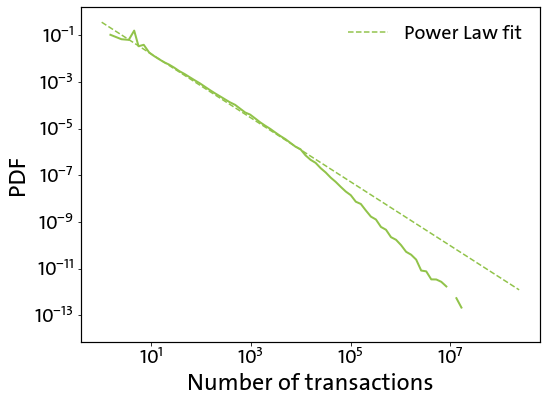

/Users/fdecollibus/anaconda3/envs/p38/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: invalid value encountered in divide
  (CDF_diff**2) /


Loglikelihood ratio between power-law and lognormal: -26365.34236847174. p-value: 0.0


/Users/fdecollibus/anaconda3/envs/p38/lib/python3.8/site-packages/powerlaw.py:699: RuntimeWarning: divide by zero encountered in divide
  (CDF_diff**2) /
Assuming nested distributions


Loglikelihood ratio between power-law and exponential: 4260198.572163121. p-value: 5.762762902182245e-78
Loglikelihood ratio between power-law and truncated power law: -15011.240879586916. p-value: 0.0
Alpha (scaling parameter) for the power law fit: 1.367394549424386
Xmin (minimum value for power law scaling) for the power law fit: 1.0


In [11]:
import numpy as np
import powerlaw
import matplotlib.pyplot as plt
#to avoid possible zero values or blank lines
scumsums=scumsums+1
# Generate some example data
data = scumsums

# Fit the data to power law model
fit = powerlaw.Fit(data, xmin=min(data))

fig = plt.figure(figsize=(8, 6))  # Sets the figure size to 12 inches by 6 inches


# Plotting original data and power law fit
fig = fit.plot_pdf(color=uzh_colors['green'], linewidth=2)
fit.power_law.plot_pdf(color=uzh_colors['green'], linestyle='--', ax=fig, label='Power Law fit')
plt.ylabel('PDF')
plt.xlabel('Number of transactions')
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('tx_powerlaw_fit_2024.pdf')
plt.show()
# Compare the power law fit with other distributions
R, p_value = fit.distribution_compare('power_law', 'lognormal')
print(f"Loglikelihood ratio between power-law and lognormal: {R}. p-value: {p_value}")

R, p_value = fit.distribution_compare('power_law', 'exponential')
print(f"Loglikelihood ratio between power-law and exponential: {R}. p-value: {p_value}")

R, p_value = fit.distribution_compare('power_law', 'truncated_power_law')
print(f"Loglikelihood ratio between power-law and truncated power law: {R}. p-value: {p_value}")

alpha = fit.power_law.alpha
xmin = fit.power_law.xmin
print(f"Alpha (scaling parameter) for the power law fit: {alpha}")
print(f"Xmin (minimum value for power law scaling) for the power law fit: {xmin}")

In [24]:
xmin = fit.lognormal.xmin
alpha = fit.lognormal.alpha
print(xmin, alpha)

AttributeError: 'Lognormal' object has no attribute 'alpha'

In [26]:
mu = fit.lognormal.mu
sigma = fit.lognormal.sigma

print(f"Lognormal mu (mean of log data): {mu}")
print(f"Lognormal sigma (standard deviation of log data): {sigma}")

Lognormal mu (mean of log data): -3.0387053117938794
Lognormal sigma (standard deviation of log data): 4.549928624617079


In [31]:
fit.power_law.sigma

0.00033840586681801977

In [32]:
# Extracting parameters for power-law distribution
alpha = fit.power_law.alpha
xmin = fit.power_law.xmin

print(f"Alpha (scaling parameter) for the power-law fit: {alpha}")
print(f"Xmin (minimum value for power-law scaling): {xmin}")

# Extracting parameters for lognormal distribution
mu = fit.lognormal.mu
sigma = fit.lognormal.sigma

print(f"Lognormal mu (mean of log data): {mu}")
print(f"Lognormal sigma (standard deviation of log data): {sigma}")

Alpha (scaling parameter) for the power-law fit: 1.367394549424386
Xmin (minimum value for power-law scaling): 1.0
Lognormal mu (mean of log data): -3.0387053117938794
Lognormal sigma (standard deviation of log data): 4.549928624617079


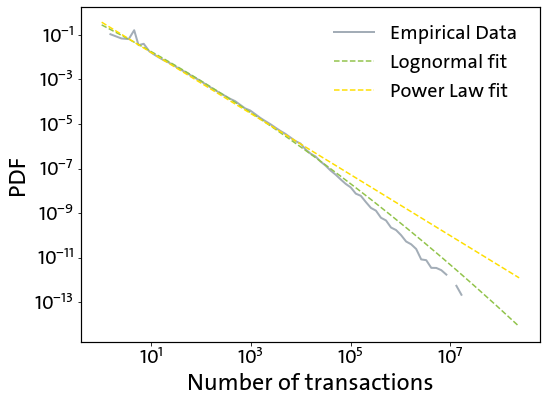

In [33]:

fig = plt.figure(figsize=(8, 6))  # Sets the figure size to 12 inches by 6 inches


# Plotting original data and power law fit
fig = fit.plot_pdf(color=uzh_colors['grey'], linewidth=2, label ='Empirical Data ')
fit.lognormal.plot_pdf(color=uzh_colors['green'], linestyle='--', ax=fig, label='Lognormal fit')
#fit.truncated_power_law.plot_pdf(color=uzh_colors['grey'], linestyle='--', ax=fig, label='Truncated Power Law fit')
fit.power_law.plot_pdf(color=uzh_colors['yellow'], linestyle='--', ax=fig, label='Power Law fit')

plt.ylabel('PDF')
plt.xlabel('Number of transactions')
plt.legend(frameon=False)
plt.tight_layout()
plt.savefig('tx_lognormal_fit_2024.pdf')
plt.show()
# Compare the power law fit with other distributions


In [ ]:
R, p_value = fit.distribution_compare('', 'truncated_power_law')
print(f"Loglikelihood ratio between power-law and truncated power law: {R}. p-value: {p_value}")

In [13]:
R, p_value = fit.distribution_compare('lognormal', 'power_law')
print(f"Loglikelihood ratio between lognormal and power_law: {R}. p-value: {p_value}")


Loglikelihood ratio between lognormal and power_law: 26365.34236847174. p-value: 0.0


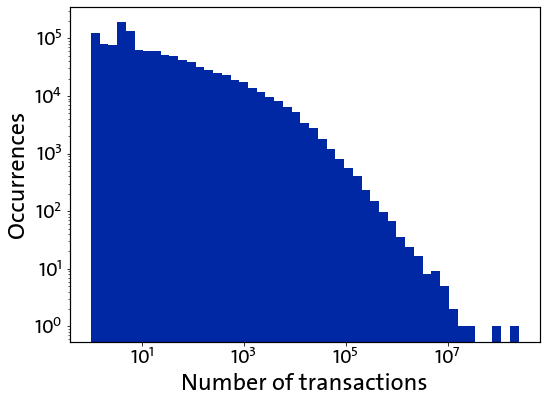

In [21]:
import numpy as np
import matplotlib.pyplot as plt
plt.figure(figsize=(8,6))
# Generate some example data

# Define the range for your bins
min_exp = np.log10(min(scumsums))
max_exp = np.log10(max(scumsums))

# Generate log-spaced bins
log_bins = np.logspace(min_exp, max_exp, num=50)

# Plot the histogram with log bins
plt.hist(scumsums, bins=log_bins, log=True)  # Setting `log=True` will use a logarithmic scale for the y-axis
plt.xscale("log")  # This sets the x-axis to a logarithmic scale

plt.xlabel("Number of transactions")
plt.ylabel("Occurrences")
#plt.title("Histogram with Log Binning")
plt.tight_layout()

plt.savefig('histogram_occurrences_2024.pdf')
plt.show()